In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

In [2]:
def sigmoid(z):
  """
  Sigmoid Function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the (0,1) range
  """

  return 1 / (1 + np.exp(-z))

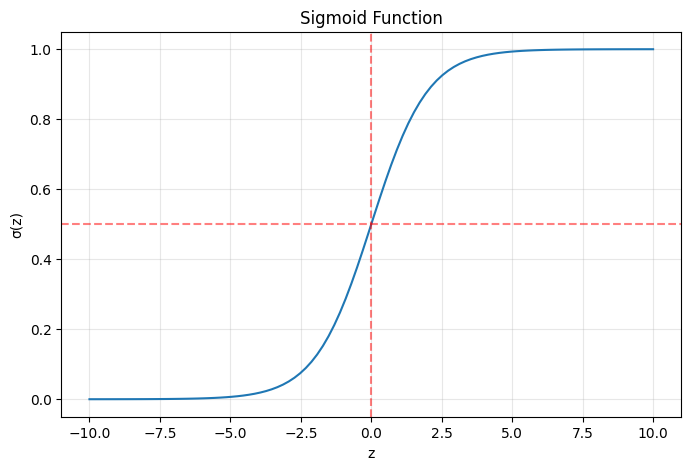

In [9]:
# Visualization
z = np.linspace(-10,10,100) # 100 evenly spaced points between -10 and 10
plt.figure(figsize=(8,5))
plt.plot(z,sigmoid(z))
plt.grid(True, alpha=0.3) # alpha is the transparency
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # Adding horizontal line
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5) # Adding vertical line
plt.show()

### Testing the property: 1 - σ(x) = σ(-x)

In [19]:
x = 3.14168
print(f"1 - σ({x}) = {1 - sigmoid(x):.6f}")
print(f"σ(-{x}) = {sigmoid(-x):.6f}")
print(f"Property holds: {np.isclose(1 - sigmoid(x), sigmoid(-x))}")  # Check if values are approximately equal

1 - σ(3.14168) = 0.041420
σ(-3.14168) = 0.041420
Property holds: True


##Sentiment Classification Example

In [50]:
class LogisticRegression:
  def __init__(self, n_features):
    """ Initializing weights and bias to zero""" ### In LogReg we initialize to 0 usually, but in deep learning to randomly close to 0 values breaking simmetry (if all weights started at zero, neurons would learn the same features)
    self.w = np.zeros(n_features)
    self.b = 0

  def predict_proba(self,x):
    """
    Compute P(y=1|x) with logistic regression
    x: feature vector
    """

    z = np.dot(self.w, x) + self.b # Linear combination: wx + b
    return(sigmoid(z))

  def predict(self,x):
    """Make binary the prediction using a .5 threshold"""
    return 1 if self.predict_proba(x) > 0.5 else 0

  def __call__(self):
    return("Logistic Regression Model with Weights: ", self.w, "Intercept:", self.b)

In [51]:
# Example from the book (sentiment analysis features)
features = {
    'positive_words': 3,      # Count of positive sentiment words
    'negative_words': 2,      # Count of negative sentiment words
    'has_no': 1,             # Binary: contains word "no"
    'pronouns': 3,           # Count of 1st/2nd person pronouns
    'has_exclamation': 0,    # Binary: contains "!"
    'log_word_count': 4.19   # Log of document length
}

# Converting dic to numpy array (order matters)
x = np.array([features['positive_words'],
              features['negative_words'],
              features['has_no'],
              features['pronouns'],
              features['has_exclamation'],
              features['log_word_count']
])

# Creating model with weights from the book
model = LogisticRegression(n_features=6)
model.w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])  # Learned weights from the book
model.b = 0.1

print(model())

# Calculate probabilities
prob_positive = model.predict_proba(x)
prob_negative = 1 - prob_positive

print(f"Feature vector x: {x}")
print(f"Weights w: {model.w}")
print(f"Bias b: {model.b}")
print(f"z = w·x + b = {np.dot(model.w, x) + model.b:.3f}")
print(f"P(positive|x) = {prob_positive:.2f}")
print(f"P(negative|x) = {prob_negative:.2f}")
print(f"Prediction: {'positive' if model.predict(x) == 1 else 'negative'}")


('Logistic Regression Model with Weights: ', array([ 2.5, -5. , -1.2,  0.5,  2. ,  0.7]), 'Intercept:', 0.1)
Feature vector x: [3.   2.   1.   3.   0.   4.19]
Weights w: [ 2.5 -5.  -1.2  0.5  2.   0.7]
Bias b: 0.1
z = w·x + b = 0.833
P(positive|x) = 0.70
P(negative|x) = 0.30
Prediction: positive


##Softmax Function for Multinomial Classification

In [56]:
def softmax(z):
  """
  Softmax Function for a vector z
  softmax(z_i) = exp(z_i) / Σ_j exp(z_j)
  """
  # Applying normalization to the vector to avoid overflow
  exp_z = np.exp(z - np.max(z)) # Substracting the top value to apply later a np.exp and use the ratios instead
  return (exp_z / np.sum(exp_z) ) # Relative distances stay the same



Input z: [ 0.6  1.1 -1.5  1.2  3.2 -1.1]
Softmax output: [0.05 0.09 0.01 0.1  0.74 0.01]
Sum of probabilities: 0.9999999999999999
z_matrix[:3]
[[-5.         0.         0.       ]
 [-4.8989899  0.         0.       ]
 [-4.7979798  0.         0.       ]]
probs[:3]:
[[0.00335766 0.49832117 0.49832117]
 [0.00371321 0.49814339 0.49814339]
 [0.00410626 0.49794687 0.49794687]]


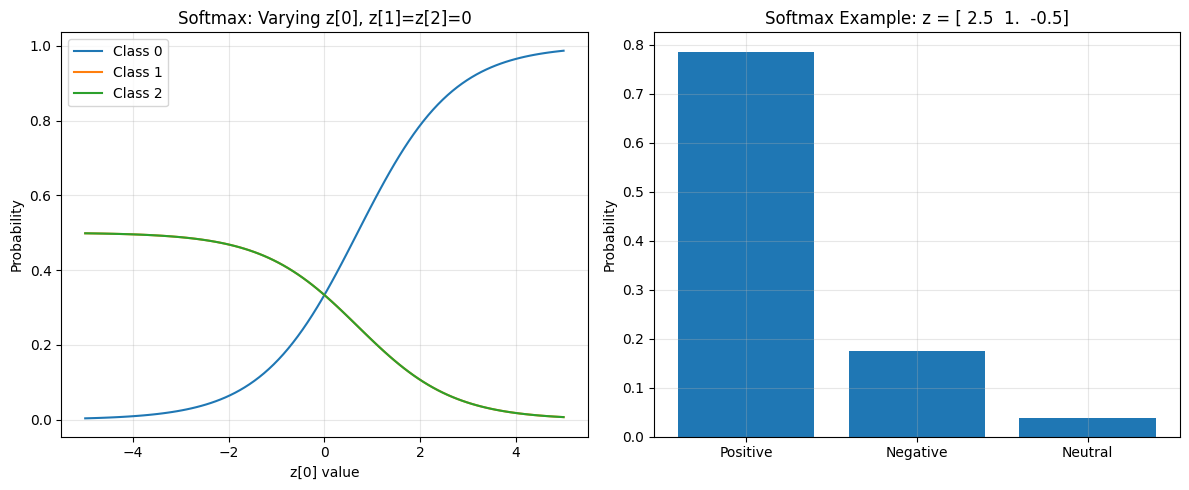

In [74]:
# Example from the textbook
z = np.array([0.6, 1.1, -1.5, 1.2, 3.2, -1.1])  # Raw scores (logits) for 6 classes
probabilities = softmax(z)

print("Input z:", z)
print("Softmax output:", np.round(probabilities, 2))
print("Sum of probabilities:", np.sum(probabilities))



### Visualization for 3 classes: both variable values and static
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

### ax1 left plot: one input variates the rest stay fixed
z_values = np.linspace(-5, 5, 100)

# Matix like [z_value, 0,0]
z_matrix = np.array([z_values, np.zeros_like(z_values), np.zeros_like(z_values)]).T
print("z_matrix[:3]")
print(z_matrix[:3])

probs = np.array([softmax(z_row) for z_row in z_matrix])
print("probs[:3]:")
print(probs[:3])

ax1.plot(z_values, probs[:,0], label= "Class 0")
ax1.plot(z_values, probs[:,1], label= "Class 1")
ax1.plot(z_values, probs[:,2], label= "Class 2")

ax1.set_xlabel('z[0] value')
ax1.set_ylabel('Probability')
ax1.set_title('Softmax: Varying z[0], z[1]=z[2]=0')
ax1.legend()
ax1.grid(True, alpha=0.3)


### ax2 right plot of constant logitss
classes = ['Positive', 'Negative', 'Neutral']
example_z = np.array([2.5, 1.0, -0.5])  # Logits for 3-way sentiment
example_probs = softmax(example_z)

ax2.bar(classes, example_probs)
ax2.set_ylabel('Probability')
ax2.set_title(f'Softmax Example: z = {example_z}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Cross-Entropy Loss Function


In [79]:
def cross_entropy_loss(y_true, y_pred):
  """
  Binary Cross-Entropy loss
  When y=1: only first term matters, when y=0: only second term matters
  L = -[(part that minimizes loss when the prediction asserts 1 ) + (part that maximizes penalization when the predictions of 1 fails )]
  L = -[       y * (log(ŷ) )     +     ( (1-y) * log(1-ŷ)     )]
  """

  epsilon = 1e-15 # for preventing log(0), which outputs as undefined
  y_pred = np.clip(y_pred, epsilon, 1 -epsilon) # limitting the value so it is defined


  return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))



## Example from the book

Model prediction: 0.7
Loss when true label is positive (y=1): 0.3567
Loss when true label is negative (y=0): 1.2040


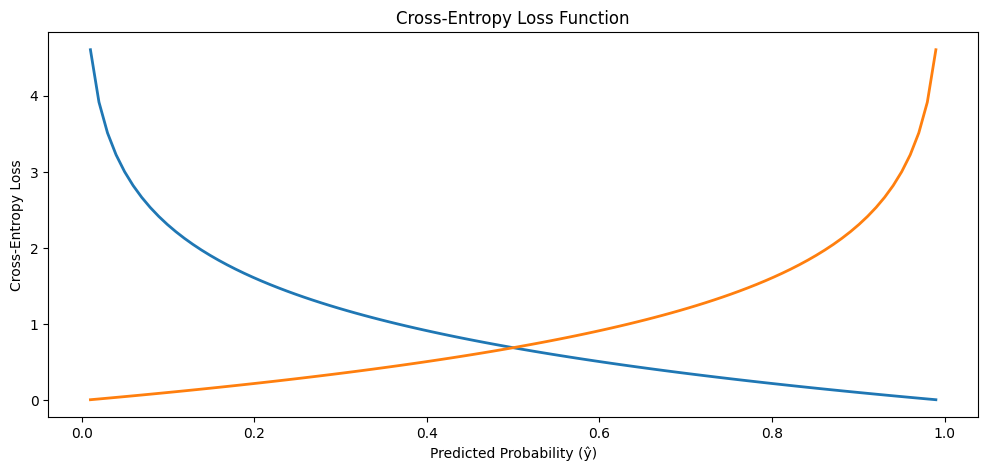

In [91]:
y_pred = 0.7
y_true_positive = 1 # + sentiment
y_true_negative = 0 # - sentiment

loss_correct = cross_entropy_loss(y_true_positive, y_pred) # Loss when prediction is correct
loss_incorrect = cross_entropy_loss(y_true_negative, y_pred) # Loss when prediction is incorrect

print(f"Model prediction: {y_pred}")
print(f"Loss when true label is positive (y=1): {loss_correct:.4f}")
print(f"Loss when true label is negative (y=0): {loss_incorrect:.4f}")

### Vis

y_pred_range = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 for numerical stability, log(0) not def
loss_when_y1 = cross_entropy_loss(1, y_pred_range)  # Loss curve when true label is 1
loss_when_y0 = cross_entropy_loss(0, y_pred_range)  # Loss curve when true label is 0


plt.figure(figsize=(12,5))

plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Cross-Entropy Loss')


plt.plot(y_pred_range, loss_when_y1, label="Loss with y=1", linewidth=2)
plt.plot(y_pred_range, loss_when_y0, label="Loss with y=0", linewidth=2)



plt.title('Cross-Entropy Loss Function')
plt.legend()

plt.show()

## Gradient Descent Implementation